# Udacity blindness detection project

## Install libraries

In [1]:
# Install libraries
!pip install git+https://github.com/qubvel/classification_models.git
!pip install tensorflow
!pip install pandas
!conda install -c conda-forge opencv -y
!pip install matplotlib

  Cloning https://github.com/qubvel/classification_models.git to c:\users\nguye\appdata\local\temp\pip-req-build-t47z317p
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-cp36-none-any.whl size=20068 sha256=8feea1fa27c6b50c590553602f9fa6f9a81924470e438aaa4d20d4ce58768bc0
  Stored in directory: C:\Users\nguye\AppData\Local\Temp\pip-ephem-wheel-cache-3z4vwuxx\wheels\de\2b\fd\29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


  Running command git clone -q https://github.com/qubvel/classification_models.git 'C:\Users\nguye\AppData\Local\Temp\pip-req-build-t47z317p'
  Running command git submodule update --init --recursive -q


Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.7.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda




# Importing

In [2]:
# Import necessary libs
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as keras
from classification_models.keras import Classifiers

C:\Users\nguye\Anaconda3\envs\env_python3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nguye\Anaconda3\envs\env_python3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nguye\Anaconda3\envs\env_python3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nguye\Anaconda3\envs\env_python3\lib\site-pack

# Read csv files (train and test)

I loaded the CVS file

In [3]:
train_data = pd.read_csv("Data/train.csv")
print(train_data.shape)

(3662, 2)


Output first 5 records from training data frame

In [4]:
train_data.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


# Dataset characteristics

In [5]:
print("Number of instances in dataset = {}".format(train_data.shape[0]))
print("Total number of columns = {}".format(train_data.columns.shape[0]))
print("Column wise count of null values:-")
print(train_data.isnull().sum())

Number of instances in dataset = 3662
Total number of columns = 2
Column wise count of null values:-
id_code      0
diagnosis    0
dtype: int64


# Data visualization

0 - No DR

1 - Mild

2 - Moderate

3 - Severe

4 - Proliferative DR

I drawed the chart to compare the diagnosis

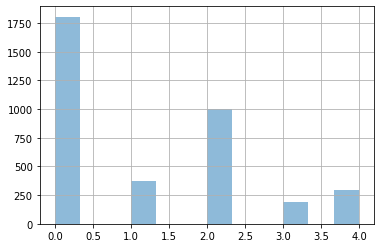

In [6]:
#TODO: Add more visualization
train_data["diagnosis"].hist(bins=12, alpha=0.5)

This chart means my training data is not balance

## Demo images

In [7]:
import math
import os

input_path = "Data"

def get_filename(image_id):
    return os.path.join(input_path, "train_images", image_id + ".png")

def show_images(diagnosis_type=0, subtitle="0 - No DR", ncol=5, nrow=5, size=(16,9)):
    image_ids = train_data[train_data['diagnosis'] == diagnosis_type]['id_code'].values
    fig = plt.figure(figsize=size)
    fig.suptitle(subtitle)
    for i in range(nrow*ncol):    
        file_path = image_ids[i]
        plt.subplot(nrow, ncol, i+1)
        img = cv2.imread(get_filename(file_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)

    

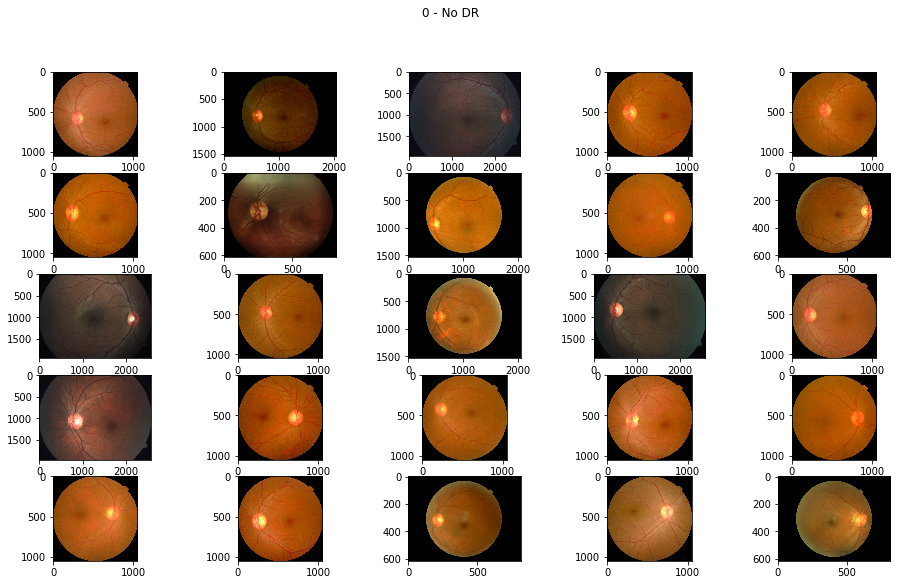

In [8]:
show_images(0, '0 - No DR', 5, 5, (16,9))

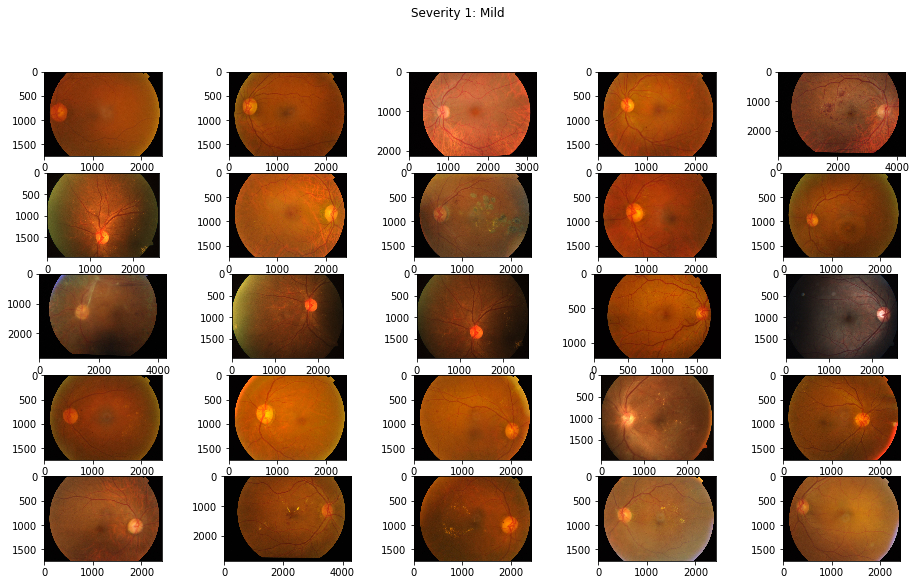

In [9]:
show_images(1, 'Severity 1: Mild', 5, 5, (16,9))

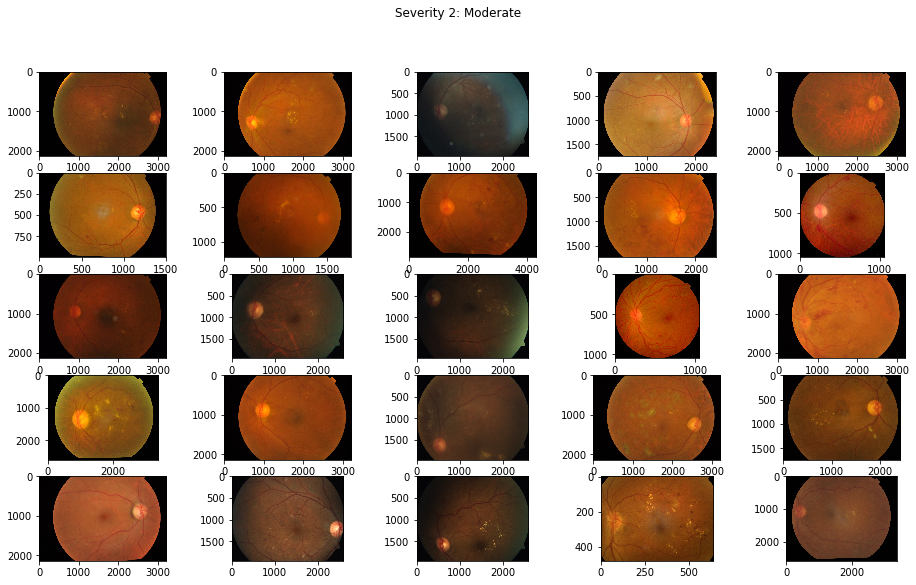

In [10]:
show_images(2, 'Severity 2: Moderate', 5, 5, (16,9))

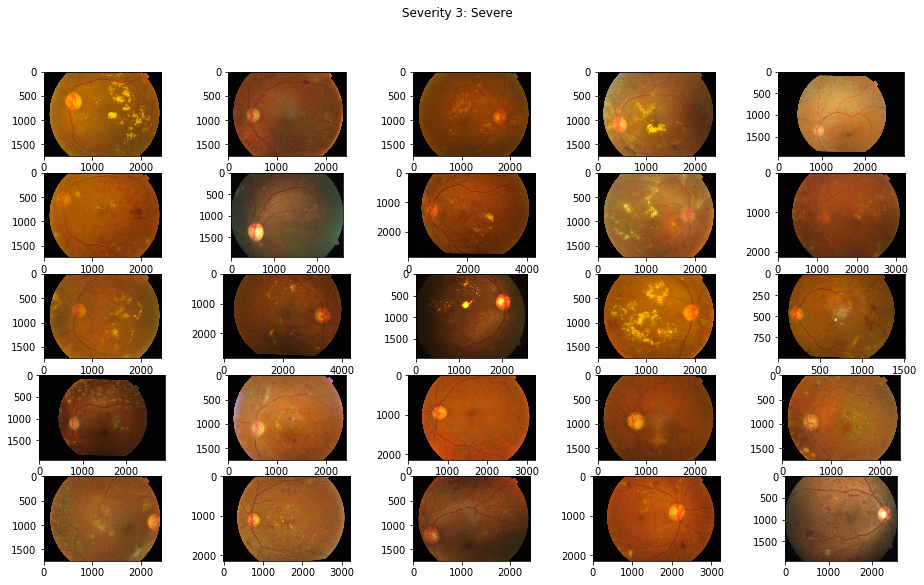

In [11]:
show_images(3, 'Severity 3: Severe', 5, 5, (16,9))

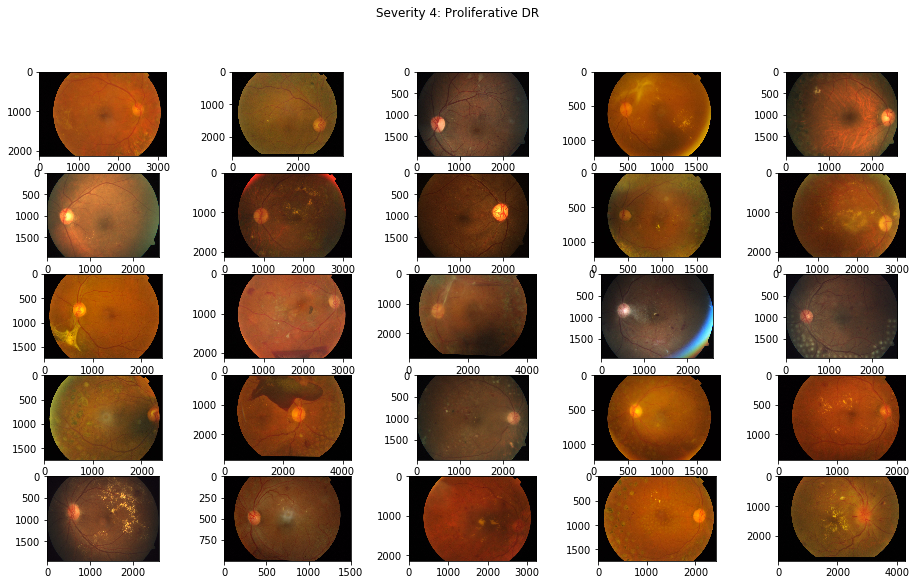

In [12]:
show_images(4, 'Severity 4: Proliferative DR', 5, 5, (16,9))

# Preprocessing data

preprocess_image method resize all of images to 224x224, changed from BGR to RGB color format.

In [13]:
DESIRED_SIZE = 224
## Function to pre-process the images
def preprocess_image(image_path, desired_size=DESIRED_SIZE):
    im = ing.imread(image_path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (desired_size, desired_size))
    return im

I tried to load the .npy files.
If the files are not exist, I will create them.

In [14]:
try:
    x_train = np.load('x_train_%d.npy' % DESIRED_SIZE)
    y_train = np.load('y_train_%d.npy' % DESIRED_SIZE)
except FileNotFoundError:
    N = train_data.shape[0]
    x_train = np.empty((N, DESIRED_SIZE, DESIRED_SIZE, 3), dtype=np.uint8)
    for i, image_id in enumerate(train_data['id_code']):
        print(i, image_id)
        image_path = 'Data/train_images/%s.png'%image_id
        x_train[i, :, :, :] = preprocess_image(image_path)

    np.save('x_train_%d.npy' % DESIRED_SIZE, x_train)
    y_train = pd.get_dummies(train_data['diagnosis']).values
    np.save('y_train_%d.npy' % DESIRED_SIZE, y_train)
    
print("X_train Shape:", x_train.shape)
print("Y_train Shape:", y_train.shape)



X_train Shape: (3662, 224, 224, 3)
Y_train Shape: (3662, 5)


# Models

## Model Methods


I defined the recall, precision and f1 for Evaluation Metrics

In [15]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

image_classification will create model

In [16]:
def image_classification(model_name='seresnet50', n_classes=5):
  # build model
  abstract_model, preprocess_input = Classifiers.get(model_name)
  base_model = abstract_model(input_shape=(224,224,3), weights='imagenet', include_top=False)
  x = keras.layers.GlobalAveragePooling2D()(base_model.output)
  output = keras.layers.Dense(n_classes, activation='softmax')(x)
  model = keras.models.Model(inputs=[base_model.input], outputs=[output])

  # train
  model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=[precision_m, recall_m, f1_m] )

  return model

## K-Fold

I splited the data to 80% for training and 20% for testing.

In [17]:
#K-fold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
score_models = {}
kfold = StratifiedKFold(n_splits=5, shuffle=True)
X = x_train
Y = np.argmax(y_train, axis=1)

## Train model


We have a list of models like below

['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'seresnet18', 'seresnet34',
'seresnet50', 'seresnet101', 'seresnet152', 'seresnext50', 'seresnext101', 'senet154', 'resnet50v2',
'resnet101v2', 'resnet152v2', 'resnext50', 'resnext101', 'vgg16', 'vgg19', 'densenet121', 'densenet169', 
'densenet201', 'inceptionresnetv2', 'inceptionv3', 'xception', 'nasnetlarge', 'nasnetmobile', 'mobilenet', 'mobilenetv2']

I choosed resnet18, seresnext50, resnet34, resnet50 for this problem

In [18]:
models = ['resnet18', 'seresnext50', 'resnet34', 'resnet50']
def train_model_by_name(model_name ='resnet18'):
    scores = []
    for train_id, test_id in kfold.split(X, Y):
      print("Kfold... %s" % model_name)
      print(X[train_id].shape, y_train[train_id].shape) # Data train
      print(X[test_id].shape, y_train[test_id].shape) # Data test
      # Define model
      model = image_classification(model_name)
      # Train model.fit
      model.fit(X[train_id], y_train[train_id], epochs=5, batch_size=8)
      # Evalue on test data score = model.evaluate()
      loss, precision, recall, f1 = model.evaluate(X[test_id], y_train[test_id])
      scores.append([precision, recall, f1])
    scores_mean = np.array(scores).mean(axis=0)
    print("Metric Validation:")
    print("Precision : %.05f, recall : %.05f, f1 : %.05f" % (scores_mean[0], scores_mean[1], scores_mean[2]))
    score_models[model_name] = list(scores_mean)
    print(score_models)


for model_name in models:
    train_model_by_name(model_name)

Kfold... resnet18
(2929, 224, 224, 3) (2929, 5)
(733, 224, 224, 3) (733, 5)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
2929/2929 [==============================] - 24s 8ms/sample - loss: 0.7750 - precision_m: 0.7925 - recall_m: 0.6512 - f1_m: 0.7080
Epoch 2/5
2929/2929 [==============================] - 20s 7ms/sample - loss: 0.5060 - precision_m: 0.8590 - recall_m: 0.7725 - f1_m: 0.8101
Epoch 3/5
2929/2929 [==============================] - 20s 7ms/sample - loss: 0.3611 - precision_m: 0.8974 - recall_m: 0.8403 - f1_m: 0.8657
Epoch 4/5
2929/2929 [==============================] - 20s 7ms/sample - loss: 0.2433 - precision_m: 0.9315 - recall_m: 0.9040 - f1_m: 0.9166
Epoch 5/5
733/733 [==============================] - 2s 2ms/sample - loss: 0.9007 - precision_m: 0.7494 - recall_m: 0.7155 - f1_m: 0.7319
Kfold... resnet18
(2929, 224, 224, 3) (2929, 5)
(733, 224, 224, 3) (733, 5)
Epoch 1/5
2929/2929 [=====

2930/2930 [==============================] - 126s 43ms/sample - loss: 0.6700 - precision_m: 0.8348 - recall_m: 0.6683 - f1_m: 0.7353
Epoch 2/5
2930/2930 [==============================] - 113s 38ms/sample - loss: 0.3806 - precision_m: 0.8991 - recall_m: 0.8277 - f1_m: 0.8597
Epoch 3/5
2930/2930 [==============================] - 113s 38ms/sample - loss: 0.2157 - precision_m: 0.9417 - recall_m: 0.9135 - f1_m: 0.9262
Epoch 4/5
2930/2930 [==============================] - 113s 38ms/sample - loss: 0.1272 - precision_m: 0.9687 - recall_m: 0.9578 - f1_m: 0.9628
Epoch 5/5
732/732 [==============================] - 10s 13ms/sample - loss: 0.7917 - precision_m: 0.8241 - recall_m: 0.8141 - f1_m: 0.8190
Kfold... seresnext50
(2931, 224, 224, 3) (2931, 5)
(731, 224, 224, 3) (731, 5)
Epoch 1/5
2931/2931 [==============================] - 133s 46ms/sample - loss: 0.6796 - precision_m: 0.8352 - recall_m: 0.6691 - f1_m: 0.7338
Epoch 2/5
2931/2931 [==============================] - 114s 39ms/sample - lo

2929/2929 [==============================] - 51s 17ms/sample - loss: 0.5485 - precision_m: 0.8505 - recall_m: 0.7374 - f1_m: 0.7862
Epoch 3/5
2929/2929 [==============================] - 51s 17ms/sample - loss: 0.4387 - precision_m: 0.8708 - recall_m: 0.8048 - f1_m: 0.8344
Epoch 4/5
2929/2929 [==============================] - 51s 17ms/sample - loss: 0.2886 - precision_m: 0.9086 - recall_m: 0.8730 - f1_m: 0.8894
Epoch 5/5
733/733 [==============================] - 10s 13ms/sample - loss: 0.6307 - precision_m: 0.8147 - recall_m: 0.7610 - f1_m: 0.7864
Kfold... resnet50
(2929, 224, 224, 3) (2929, 5)
(733, 224, 224, 3) (733, 5)
Epoch 1/5
2929/2929 [==============================] - 62s 21ms/sample - loss: 0.7772 - precision_m: 0.7966 - recall_m: 0.6448 - f1_m: 0.7060
Epoch 2/5
2929/2929 [==============================] - 51s 17ms/sample - loss: 0.5483 - precision_m: 0.8444 - recall_m: 0.7360 - f1_m: 0.7831
Epoch 3/5
2929/2929 [==============================] - 51s 18ms/sample - loss: 0.417

# Choose model

After the training we can see the results like below

## resnet18

In [19]:
print("Recal", score_models['resnet18'][0])
print("Precission", score_models['resnet18'][1])
print("F1", score_models['resnet18'][2])

Recal 0.795483
Precission 0.75918734
F1 0.77659225


## seresnext50

In [20]:
print("Recal", score_models['seresnext50'][0])
print("Precission", score_models['seresnext50'][1])
print("F1", score_models['seresnext50'][2])

Recal 0.8106526
Precission 0.7914171
F1 0.8007201


## resnet34

In [21]:
print("Recal", score_models['resnet34'][0])
print("Precission", score_models['resnet34'][1])
print("F1", score_models['resnet34'][2])

Recal 0.78417337
Precission 0.7609518
F1 0.7721284


## resnet50

In [22]:
print("Recal", score_models['resnet50'][0])
print("Precission", score_models['resnet50'][1])
print("F1", score_models['resnet50'][2])

Recal 0.7330123
Precission 0.68673646
F1 0.70864904


## Based on the results above, I will choose the model seresnext50 for this problem